In [60]:
# from data_download import *
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing as ppc
%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download

In [4]:
datadict = data_download.get_dataframes()
tables = data_download.get_tables(datadict)

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [6]:
sales = datadict['rp_sale']
residences = datadict['res_bldg']
parcels = datadict['parcel']

In [27]:
ordinal = tables[0]
categorical = tables[1]

In [9]:
ordinal

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2
28297,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0
28298,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0
28299,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Made SqFtPorch row in combo df
ordinal['SqFtPorch'] =(ordinal['SqFtEnclosedPorch'] + ordinal['SqFtOpenPorch'])


In [11]:
ordinal.head()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise,SqFtPorch
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0,300
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0


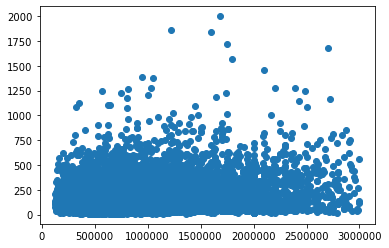

In [28]:
# Made SqFtPorch scatterplot to find linear correlation
porch = ordinal.loc[ordinal['SqFtPorch'] > 0, :]
plt.scatter(porch['SalePrice'], porch['SqFtPorch']);

In [29]:
# Made a sales vs. SqFtPorch correlation report
formula = 'SalePrice ~ SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = porch).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     858.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:18:25   Log-Likelihood:            -2.2363e+05
No. Observations:               15506   AIC:                         4.473e+05
Df Residuals:                   15503   BIC:                         4.473e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.619e+05   5704.519    116.027      0.000    6.51e+05    6.73e+05
SqFtPorch    840.1133     25.883     32.458      0.000     789.380     890.847
SqFtDeck     452.6557     17.011     26.610      0.000     419.313     485.998
==============================================================================
Omnibus:                     3957.102   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9834.488
Skew:                           1.404   Prob(JB):                         0.00
Kurtosis:                       5.708   Cond. No.                         420.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# Added TotFloorPlan column to check proportion of floor plan vs lot size
ordinal['TotFloorPlan'] = (ordinal['SqFtGarageAttached'] + ordinal['SqFtDeck'] + ordinal['SqFtPorch'] + ordinal['SqFt1stFloor'])

In [31]:
# Created proportion lot variable
PropLot = ordinal['TotFloorPlan'] / ordinal['SqFtLot']

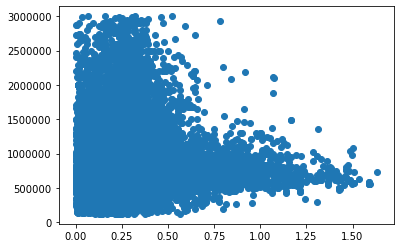

In [32]:
# Checked proportion lot correlation graph
plt.scatter(PropLot, ordinal['SalePrice']);

In [17]:
# Regression Report results
formula = 'SalePrice ~ PropLot'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     184.2
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           7.87e-42
Time:                        09:16:39   Log-Likelihood:            -4.0158e+05
No. Observations:               27924   AIC:                         8.032e+05
Df Residuals:                   27922   BIC:                         8.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.115e+05   4479.259    158.840      0.000    7.03e+05     7.2e+05
PropLot     1.888e+05   1.39e+04     13.573      0.000    1.62e+05    2.16e+05
==============================================================================
Omnibus:                    10339.492   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38916.978
Skew:                           1.856   Prob(JB):                         0.00
Kurtosis:                       7.434   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

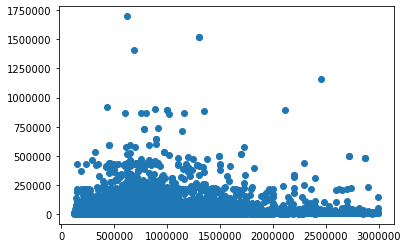

In [36]:
# Checked linearity of SqFtLot to SalePrice
normlot = ordinal[(ordinal['SqFtLot'] > 0) & (ordinal['SqFtLot'] <= 3000000)]
plt.scatter(normlot['SalePrice'], normlot['SqFtLot']);

In [39]:
correlations = ordinal.corr()['SalePrice']

In [40]:
high_corrs = correlations.sort_values(ascending = False).head(20)
low_corrs = correlations.sort_values(ascending = True).head(20)

In [21]:
high_corrs

SalePrice             1.000000
BldgGrade             0.625155
SqFtTotLiving         0.600756
TotFloorPlan          0.394326
SqFt1stFloor          0.352494
BathFullCount         0.336938
SqFtOpenPorch         0.293147
Bedrooms              0.292941
Stories               0.287711
SqFtPorch             0.284847
Territorial           0.250041
SqFtFinBasement       0.240641
SqFtTotBasement       0.227445
LakeWashington        0.214934
Bath3qtrCount         0.206773
FinBasementGrade      0.201788
SqFtDeck              0.201664
BathHalfCount         0.200138
SqFtGarageAttached    0.168924
FpSingleStory         0.166897
Name: SalePrice, dtype: float64

In [41]:
low_corrs

Condition             -0.065275
FpFreestanding        -0.061528
SqFtUnfinFull          0.002749
SqFtEnclosedPorch      0.004030
TrafficNoise           0.004827
SqFtUnfinHalf          0.006446
NbrLivingUnits         0.009405
MtRainier              0.021947
SmallLakeRiverCreek    0.039506
WfntFootage            0.046074
SqFtLot                0.056683
LotDepthFactor         0.061224
OtherView              0.066007
BrickStone             0.069056
SqFtGarageBasement     0.070703
YrRenovated            0.084823
FpAdditional           0.086597
SqFtUpperFloor         0.089020
AddnlCost              0.098989
Cascades               0.120323
Name: SalePrice, dtype: float64

In [42]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + SqFtDeck'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     5566.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:19:30   Log-Likelihood:            -3.9512e+05
No. Observations:               27924   AIC:                         7.903e+05
Df Residuals:                   27920   BIC:                         7.903e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.649e+05   5149.775     32.012      0.000    1.55e+05    1.75e+05
SqFtTotLiving   254.2315      2.430    104.643      0.000     249.470     258.993
SqFtPorch       179.9508     17.739     10.144      0.000     145.181     214.721
SqFtDeck        231.3772      9.890     23.395      0.000     211.992     250.762
==============================================================================
Omnibus:                     7863.233   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31578.584
Skew:                           1.351   Prob(JB):                         0.00
Kurtosis:                       7.454   Cond. No.                     6.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
from sklearn.feature_selection import RFE

lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=3)
select = select.fit(X = wine.drop('SalePrice', axis=1), y = wine['quality'])

select.support_

select.ranking_

In [43]:
formula = 'SalePrice ~ SqFtTotLiving + SqFtPorch + SqFtLot'
model = smf.ols(formula = formula, data = ordinal).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     5282.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        09:19:46   Log-Likelihood:            -3.9539e+05
No. Observations:               27924   AIC:                         7.908e+05
Df Residuals:                   27920   BIC:                         7.908e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.75e+05   5184.267     33.757      0.000    1.65e+05    1.85e+05
SqFtTotLiving   266.2950      2.403    110.812      0.000     261.585     271.005
SqFtPorch       124.6038     17.815      6.994      0.000      89.685     159.522
SqFtLot          -0.0711      0.035     -2.028      0.043      -0.140      -0.002
==============================================================================
Omnibus:                     7968.352   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31615.248
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                       7.429   Cond. No.                     1.55e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,18,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N


In [75]:
categorical['HBUAsImproved'].value_counts()

1    27423
0      280
2      208
4       11
3        2
Name: HBUAsImproved, dtype: int64

In [61]:
label_encoder = ppc.LabelEncoder()
status_labels = label_encoder.fit_transform(categorical["AdjacentGreenbelt"])
status_labels

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
label_encoder.classes_

array(['N', 'Y'], dtype=object)

In [65]:


categorical["Status_Encoded"] = status_labels
categorical.drop('AdjacentGreenbelt', axis=1, inplace=False)

ohgreenbelt = smf.ols(formula = "SalePrice ~ SqFtTotLiving + SqFtPorch + Status_Encoded", exog = categorical)
ohgreenbelt_results = oh_greenbelt.fit()

ohgreenbelt_results.summary()

TypeError: from_formula() missing 1 required positional argument: 'formula'

In [47]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,18,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N


In [98]:
categorical['PropertyClass'].value_counts()

8    27377
7      526
2        8
1        8
9        4
3        1
Name: PropertyClass, dtype: int64

In [97]:
ohe = ppc.OneHotEncoder(sparse = False)

varsdf = pd.DataFrame(ohe.fit_transform(categorical[['PropertyClass']]),  index = categorical.index)
varsdf.columns = ['PropC' + str(pc) for pc in list(ohe.categories_[0])]
varsdf.drop('PropC1.0', axis= 1, inplace = True)
varsdf

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


,PropC2.0,PropC3.0,PropC7.0,PropC8.0,PropC9.0
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
28296,0.0,0.0,0.0,1.0,0.0
28297,0.0,0.0,0.0,1.0,0.0
28298,0.0,0.0,0.0,1.0,0.0
28299,0.0,0.0,0.0,1.0,0.0


In [81]:
ohe.__dict__

{'categories': None,
 'sparse': False,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'n_values': None,
 'categorical_features': None,
 'drop': None,
 '_n_values': 'auto',
 '_categories': None,
 '_categorical_features': 'all',
 '_legacy_mode': True,
 '_n_values_': array([10]),
 'categories_': [array([1., 2., 3., 7., 8., 9.])],
 '_feature_indices_': array([ 0, 10]),
 '_active_features_': array([1, 2, 3, 7, 8, 9])}

In [85]:
list(ohe.categories_[0])

[1.0, 2.0, 3.0, 7.0, 8.0, 9.0]

In [66]:
categorical['PropertyClass'].value_counts()

8    27377
7      526
2        8
1        8
9        4
3        1
Name: PropertyClass, dtype: int64

In [92]:
varsdf

,PropC2.0,PropC3.0,PropC7.0,PropC8.0,PropC9.0
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
28296,0.0,0.0,0.0,1.0,0.0
28297,0.0,0.0,0.0,1.0,0.0
28298,0.0,0.0,0.0,1.0,0.0
28299,0.0,0.0,0.0,1.0,0.0


In [99]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt,Status_Encoded
0,18,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
1,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
2,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0
3,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
4,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0


In [100]:
categorical[categorical['PropertyClass'] == 7].sample(10)

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt,Status_Encoded
24342,1,7,7,2,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
2196,1,7,4,3,2,6,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
119,1,7,5,2,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
15963,1,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
26225,1,7,1,3,29,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,Y,N,N,0
12181,1,7,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
3261,1,7,5,2,300,1,0,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
18571,1,7,7,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
837,1,7,5,2,2,1,1,2,1,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0
10576,1,7,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0


In [101]:
ordinal

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise,SqFtPorch,TotFloorPlan
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1460
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,810
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1980
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0,300,2940
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0,0,690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2,300,2293
28297,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1480
28298,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0,230,1970
28299,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0,40,1790


In [102]:
prices = ordinal['SalePrice']

In [103]:
len(prices)

27924

In [111]:
property_classes = categorical[['PropertyClass']] 

In [105]:
len(property_classes)

27924

In [113]:
property_classes['SalePrice'] = prices

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


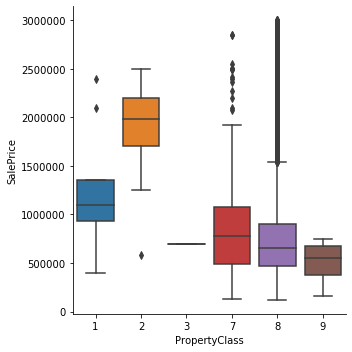

In [135]:


# ax.scatter(property_classes, prices, alpha= 0.2);
sns.catplot(x= 'PropertyClass', y= 'SalePrice', kind = 'box', data= property_classes);

In [116]:
property_classes[property_classes['PropertyClass']==7].mean()

PropertyClass         7.000000
SalePrice        847417.423954
dtype: float64

In [117]:
property_classes[property_classes['PropertyClass']==8].mean()

PropertyClass         8.000000
SalePrice        759411.993206
dtype: float64

In [118]:
heat_df = ordinal[['SalePrice']]

In [119]:
heat_df['HeatSystem'] = categorical['HeatSystem']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [120]:
heat_df.head()

,SalePrice,HeatSystem
0,193000,5
1,550000,4
2,648500,5
3,1445000,5
4,785000,1


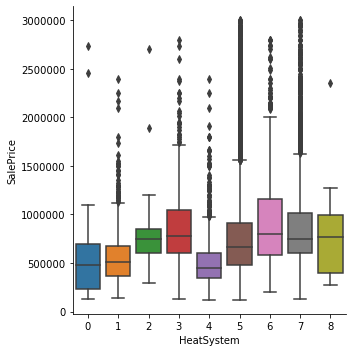

In [131]:
sns.catplot(x= 'HeatSystem', y= 'SalePrice', kind = 'box', data= heat_df);

In [122]:
heatsource_df = ordinal[['SalePrice']]

In [123]:
heatsource_df['HeatSource'] = categorical['HeatSource']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


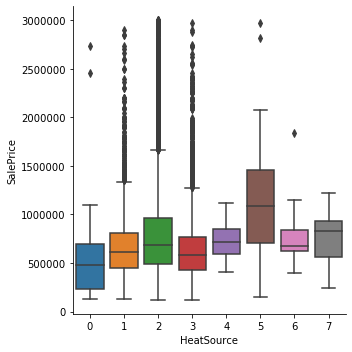

In [130]:
sns.catplot(x= 'HeatSource', y= 'SalePrice', kind = 'box', data= heatsource_df);

In [125]:
categorical.head()

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt,Status_Encoded
0,18,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
1,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
2,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0
3,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N,0
4,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N,0


In [139]:
HBUAsImproved_df = ordinal[['SalePrice']]

In [140]:
HBUAsImproved_df['HBUAsImproved'] = categorical['HBUAsImproved']

/Users/reuben/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


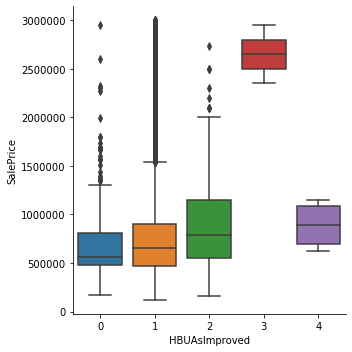

In [134]:
sns.catplot(x= 'HBUAsImproved', y= 'SalePrice', kind = 'box', data= HBUAsImproved_df);